In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# 데이터 불러오기
df=pd.read_csv('./Data/hangang2023.csv')
df

,msfrtn_resc_reprt_no,acdnt_cause,prcs_result_se_nm,dclr_ymd,dclr_tm,dclr_yr,season_se_nm,qtr_se,dclr_mnth,dclr_day,...,frstt_nm,ward_nm,lfdau_nm,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit
0,20231126307R00001,수난,자체처리,20230101,10800,2023,겨울,1,1,1,...,119특수구조단,광나루수난구조대,NaN,1.5,NaN,2.0,250.0,71.0,NaN,1104.0
1,20231113201R00001,수난,타기관 인계,20230101,12500,2023,겨울,1,1,1,...,마포소방서,구조대,NaN,1.5,NaN,2.0,250.0,71.0,NaN,1104.0
2,20231108201R00001,수난,타기관 인계,20230101,24300,2023,겨울,1,1,1,...,영등포소방서,구조대,NaN,1.5,NaN,2.0,250.0,72.0,NaN,925.0
3,20231106105R00001,수난,오인신고,20230101,64800,2023,겨울,1,1,1,...,용산소방서,서빙고119안전센터,NaN,-0.2,NaN,3.0,320.0,67.0,NaN,962.0
4,20231126305R00001,수난,자체처리,20230101,64800,2023,겨울,1,1,1,...,119특수구조단,반포수난구조대,NaN,-0.2,NaN,3.0,320.0,67.0,NaN,962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,20231127402R01271,수난,타기관 인계,20231231,10900,2023,겨울,4,12,31,...,성동소방서,구조대,NaN,2.1,NaN,2.0,50.0,98.0,8.5,164.0
3754,20231113201R01962,수난,타기관 인계,20231231,12800,2023,겨울,4,12,31,...,마포소방서,구조대,NaN,2.1,NaN,2.0,50.0,98.0,8.5,164.0
3755,20231115402R02065,수난,타기관 인계,20231231,70900,2023,겨울,4,12,31,...,서초소방서,구조대,NaN,2.8,NaN,2.0,340.0,100.0,5.5,105.0
3756,20231106201R01243,수난,타기관 인계,20231231,230800,2023,겨울,4,12,31,...,용산소방서,구조대,NaN,0.9,NaN,1.0,70.0,96.0,2.4,656.0


In [56]:
# 안쓰는 컬럼 제거
df = df.drop(labels=['dclr_hour', 'dclr_day', 'hmg_mnth', 'acdnt_cause', 'dclr_ymd', 'ward_nm', 'prcs_result_se_nm', 'emd_se_nm', 'hmg_min', 'dclr_mnth', 'qtr_se', 'hmg_ymd', 'spt_arvl_yr', 'acdnt_place_detail_nm', 'hmg_yr', 'dclr_tm', 'lfdau_nm', 'resc_cmptn_yr', 'hmg_hour', 'frstt_nm', 'cty_frmvl_se_nm', 'dclr_min', 'acdnt_place_nm', 'hmg_tm', 'dclr_yr', 'hmg_day'
], axis=1)

In [57]:
# 결측치 확인
df.isnull().sum()

msfrtn_resc_reprt_no       0
season_se_nm               0
daywk                      0
dsp_ymd                    1
dsp_tm                     1
dsp_yr                     1
dsp_mnth                   1
dsp_day                    1
dsp_hour                   1
dsp_min                    1
spt_arvl_ymd             120
spt_arvl_tm              120
spt_arvl_mnth            120
spt_arvl_day             120
spt_arvl_hour            120
spt_arvl_min             120
resc_cmptn_ymd           165
resc_cmptn_tm            165
resc_cmptn_mnth          165
resc_cmptn_day           165
resc_cmptn_hour          165
resc_cmptn_min           165
sido_nm                    0
sigungu_nm                 0
emd_nm                     0
gis_x_axis                 0
gis_y_axis                 0
spt_frstt_dist            27
acdnt_cause_asort_nm       0
time_unit_tmprt            1
time_unit_rainqty       3232
time_unit_ws              19
time_unit_wd              19
time_unit_humidity         1
time_unit_msnf

In [65]:
# 결측치 있는 행 삭제
df = df.dropna(subset=['daywk', 'spt_arvl_ymd','resc_cmptn_ymd', 'time_unit', 'time_unit_ws', 'spt_frstt_dist'])

# 강수량 및 적설량 NULL 값 0으로 대체
df.loc[df['time_unit_rainqty'] != df['time_unit_rainqty'], 'time_unit_rainqty'] = 0
df.loc[df['time_unit_msnf'] != df['time_unit_msnf'], 'time_unit_msnf'] = 0

# 결측치 재확인
df.isnull().sum()

,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,gis_y_axis,spt_frstt_dist,acdnt_cause_asort_nm,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit
0,20231126307R00001,겨울,일요일,20230101.0,11100.0,2023.0,1.0,1.0,1.0,11.0,...,552416.6000,0.0,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0
1,20231113201R00001,겨울,일요일,20230101.0,12600.0,2023.0,1.0,1.0,1.0,26.0,...,549753.4163,2.2,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0
2,20231108201R00001,겨울,일요일,20230101.0,24400.0,2023.0,1.0,1.0,2.0,44.0,...,547664.6300,3.0,수색,1.5,0.0,2.0,250.0,72.0,0.0,925.0
3,20231106105R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,545143.3199,2.1,수색,-0.2,0.0,3.0,320.0,67.0,0.0,962.0
4,20231126305R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,545143.3199,0.2,기타 수난,-0.2,0.0,3.0,320.0,67.0,0.0,962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,20231127402R01271,겨울,일요일,20231231.0,11000.0,2023.0,12.0,31.0,1.0,10.0,...,550033.4684,0.6,사체인양,2.1,0.0,2.0,50.0,98.0,8.5,164.0
3754,20231113201R01962,겨울,일요일,20231231.0,12900.0,2023.0,12.0,31.0,1.0,29.0,...,548797.4191,3.2,기타 수난,2.1,0.0,2.0,50.0,98.0,8.5,164.0
3755,20231115402R02065,겨울,일요일,20231231.0,71000.0,2023.0,12.0,31.0,7.0,10.0,...,546124.3806,1.9,기타 수난,2.8,0.0,2.0,340.0,100.0,5.5,105.0
3756,20231106201R01243,겨울,일요일,20231231.0,231000.0,2023.0,12.0,31.0,23.0,10.0,...,546123.5575,2.5,기타 수난,0.9,0.0,1.0,70.0,96.0,2.4,656.0


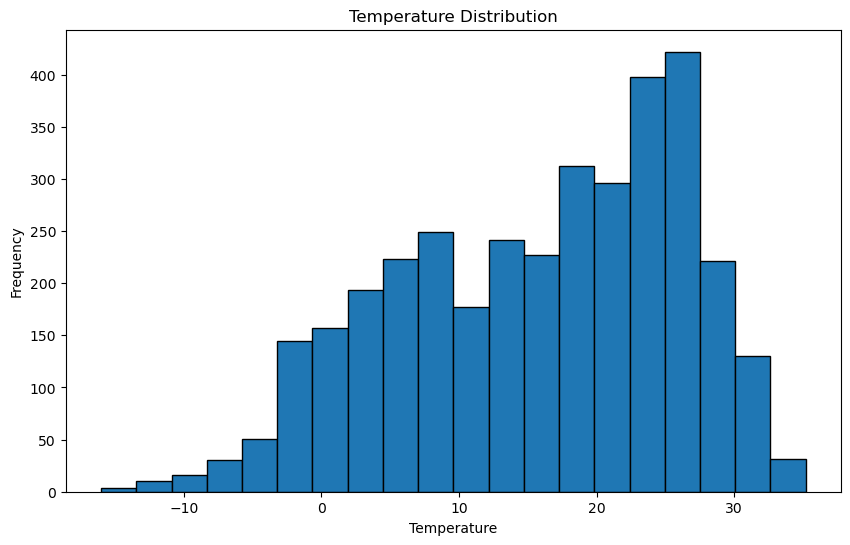

In [66]:
# 기온에 대한 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['time_unit_tmprt'], bins=20, edgecolor='k')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

/Users/jungdain/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jungdain/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jungdain/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jungdain/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jungdain/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48388 (\N{HANGUL SYLLABLE BOM}) missing

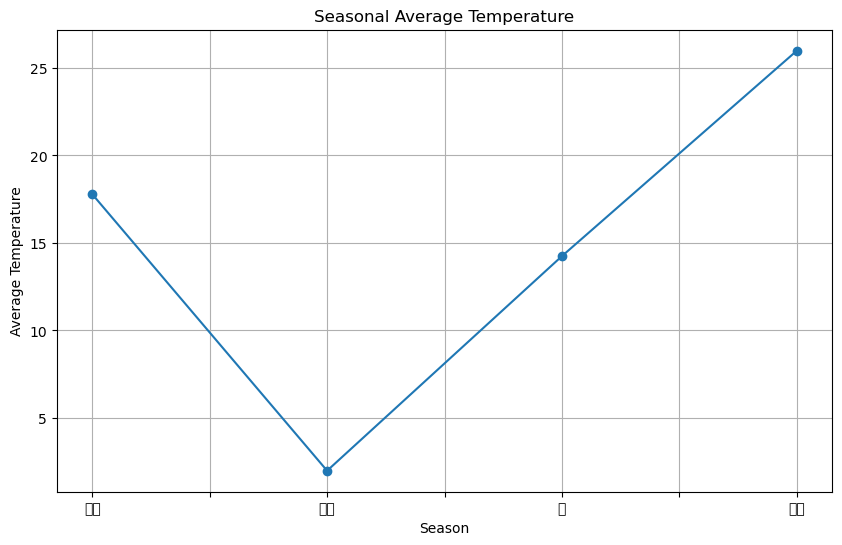

In [72]:
# 3. Seasonal temperature trends
season_temp = df.groupby('season_se_nm')['time_unit_tmprt'].mean()

plt.figure(figsize=(10, 6))
season_temp.plot(kind='line', marker='o')
plt.title('Seasonal Average Temperature')
plt.xlabel('Season')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()